# Analisis Tren dan Pola Kualitas Udara di Enam Kota Global Tahun 2023

Mengakses API Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"naufallwcksn","key":"eccaae788426e109cd12d8177e64adb3"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d youssefelebiary/global-air-quality-2023-6-cities --quiet
!unzip global-air-quality-2023-6-cities.zip

Dataset URL: https://www.kaggle.com/datasets/youssefelebiary/global-air-quality-2023-6-cities
License(s): MIT
Archive:  global-air-quality-2023-6-cities.zip
  inflating: Air_Quality.csv         
  inflating: Brasilia_Air_Quality.csv  
  inflating: Cairo_Air_Quality.csv   
  inflating: Dubai_Air_Quality.csv   
  inflating: London_Air_Quality.csv  
  inflating: New_York_Air_Quality.csv  
  inflating: Sydney_Air_Quality.csv  


Mengimport Library

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Membaca dataset .csv

In [5]:
df = pd.read_csv("Air_Quality.csv")
print(df.shape)
df.head()

(52560, 9)


,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999


In [17]:
df['City'].unique()

array(['Brasilia', 'Cairo', 'Dubai', 'London', 'New York', 'Sydney'],
      dtype=object)

In [16]:
df.describe()

,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,273.372565,28.930514,12.051645,55.304433,18.621792,35.505850,41.941352
std,171.578815,25.473936,14.684127,36.939938,15.897499,41.866614,24.989747
min,48.000000,0.000000,0.000000,0.000000,0.000000,0.100000,8.000000
25%,160.000000,11.100000,2.500000,29.000000,7.100000,11.000000,22.638333
50%,224.000000,22.100000,5.800000,51.000000,13.400000,20.800000,32.400000
75%,335.000000,38.700000,17.300000,74.000000,24.900000,41.700000,61.013332
max,2145.000000,251.900000,200.800000,425.000000,143.400000,550.000000,188.319980


In [15]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

,0
Date,0
City,0
CO,0
NO2,0
SO2,0
O3,0
PM2.5,0
PM10,0
AQI,0


Menghitung Rata-rata polutan pada setiap kota

In [52]:
city_avg = df.groupby('Date')[[ 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']].mean().reset_index()

Memvisualisasikan polutan pada setiap kota

/tmp/ipython-input-56-3482009705.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["Month"] = df["Date"].dt.to_period("M").astype(str)


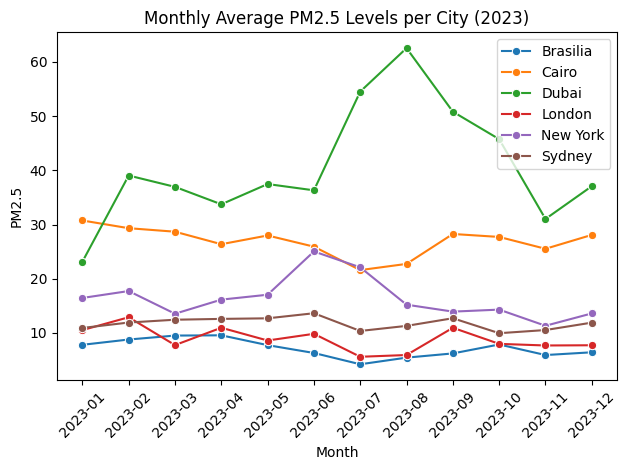

In [56]:
# Konversi kolom tanggal jadi datetime
df["Date"] = pd.to_datetime(df["Date"])

# Tambahkan kolom bulan
df["Month"] = df["Date"].dt.to_period("M").astype(str)

# Hitung rata-rata PM2.5 per bulan per kota
monthly_avg = df.groupby(["Month", "City"])["PM2.5"].mean().reset_index()

# Plot ulang
sns.lineplot(data=monthly_avg, x="Month", y="PM2.5", hue="City", marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Average PM2.5 Levels per City (2023)")

# Pindahkan legenda ke pojok kanan atas di dalam area plot
plt.legend(loc="upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

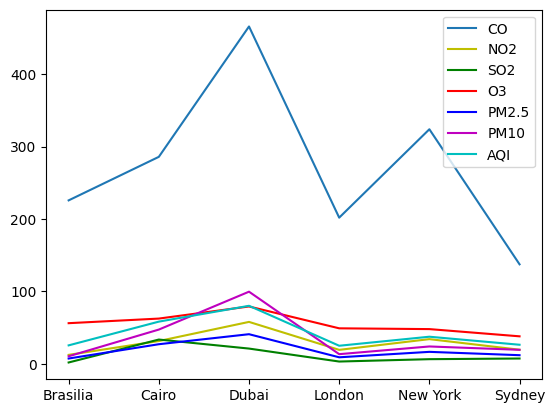

In [32]:
plt.plot(city_avg["City"], city_avg["CO"])
plt.plot(city_avg["City"], city_avg["NO2"], color='y')
plt.plot(city_avg["City"], city_avg["SO2"], color='g')
plt.plot(city_avg["City"], city_avg["O3"], color='r')
plt.plot(city_avg["City"], city_avg["PM2.5"], color='b')
plt.plot(city_avg["City"], city_avg["PM10"], color='m')
plt.plot(city_avg["City"], city_avg["AQI"], color='c')
plt.legend(['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI'])
plt.show()

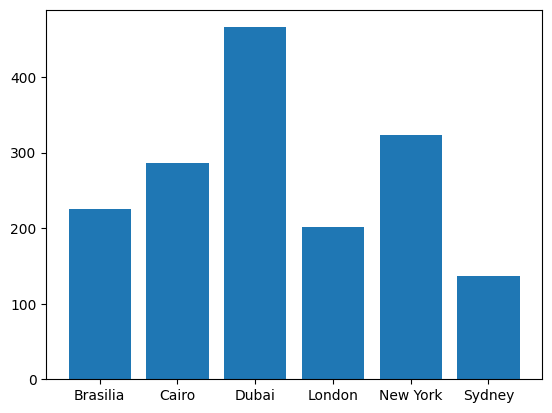

In [35]:
plt.bar(city_avg["City"], city_avg["CO"])
plt.show()

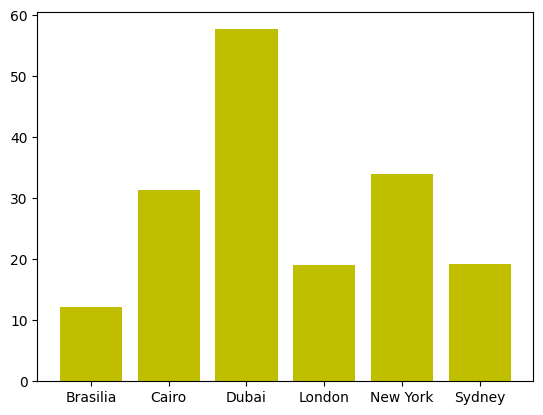

In [36]:
plt.bar(city_avg["City"], city_avg["NO2"], color='y')
plt.show()

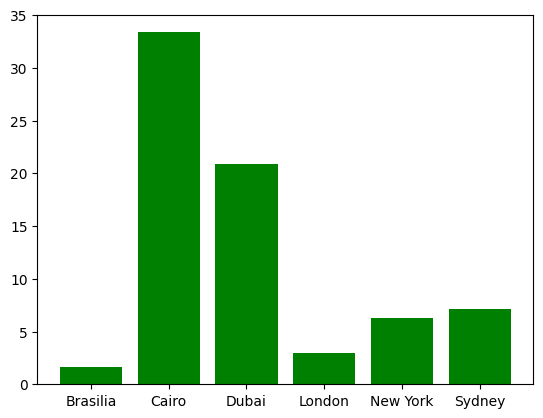

In [37]:
plt.bar(city_avg["City"], city_avg["SO2"], color='g')
plt.show()

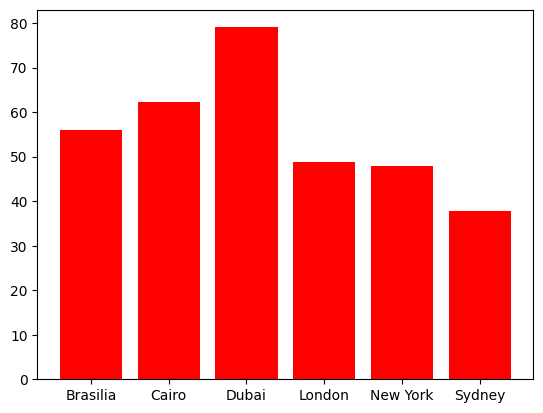

In [38]:
plt.bar(city_avg["City"], city_avg["O3"], color='r')
plt.show()

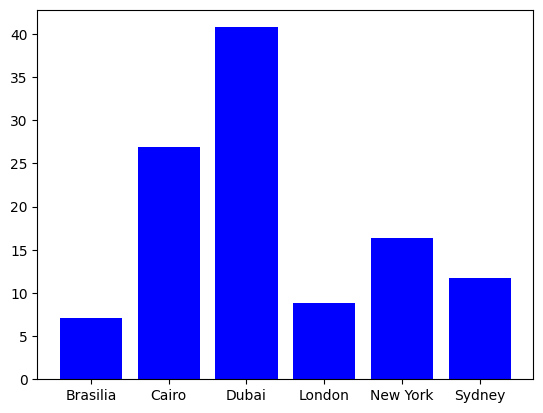

In [39]:
plt.bar(city_avg["City"], city_avg["PM2.5"], color='b')
plt.show()

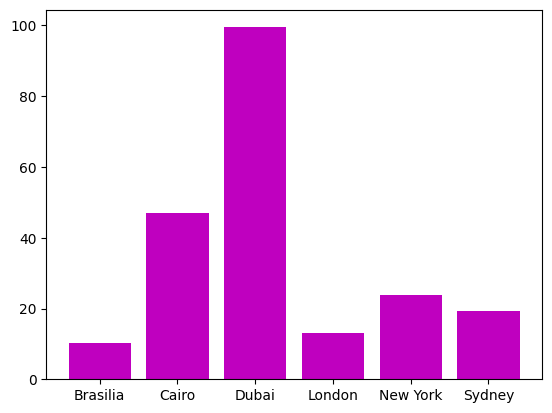

In [40]:
plt.bar(city_avg["City"], city_avg["PM10"], color='m')
plt.show()

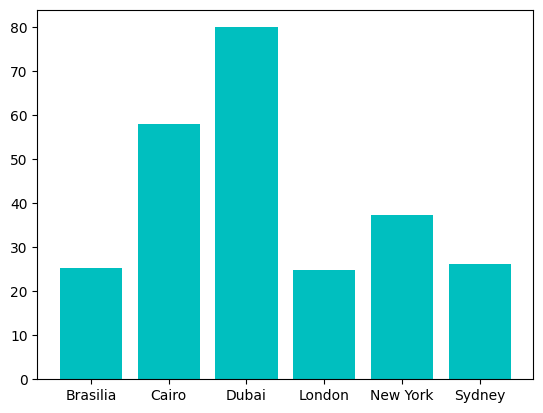

In [41]:
plt.bar(city_avg["City"], city_avg["AQI"], color='c')
plt.show()

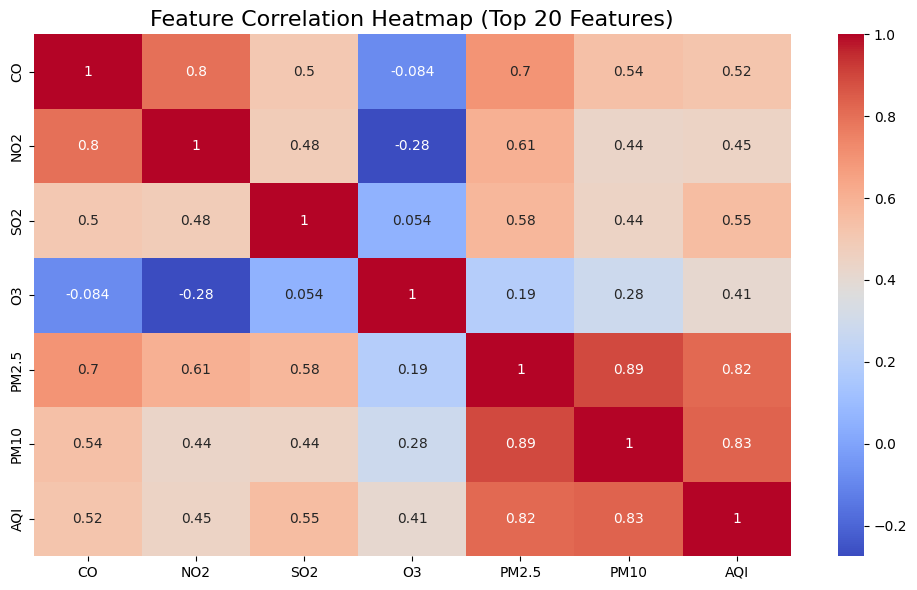

In [9]:
corr = df[["CO", "NO2", "SO2", "O3", "PM2.5", "PM10", "AQI"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title('Feature Correlation Heatmap (Top 20 Features)', fontsize=16)
plt.tight_layout()
plt.show()

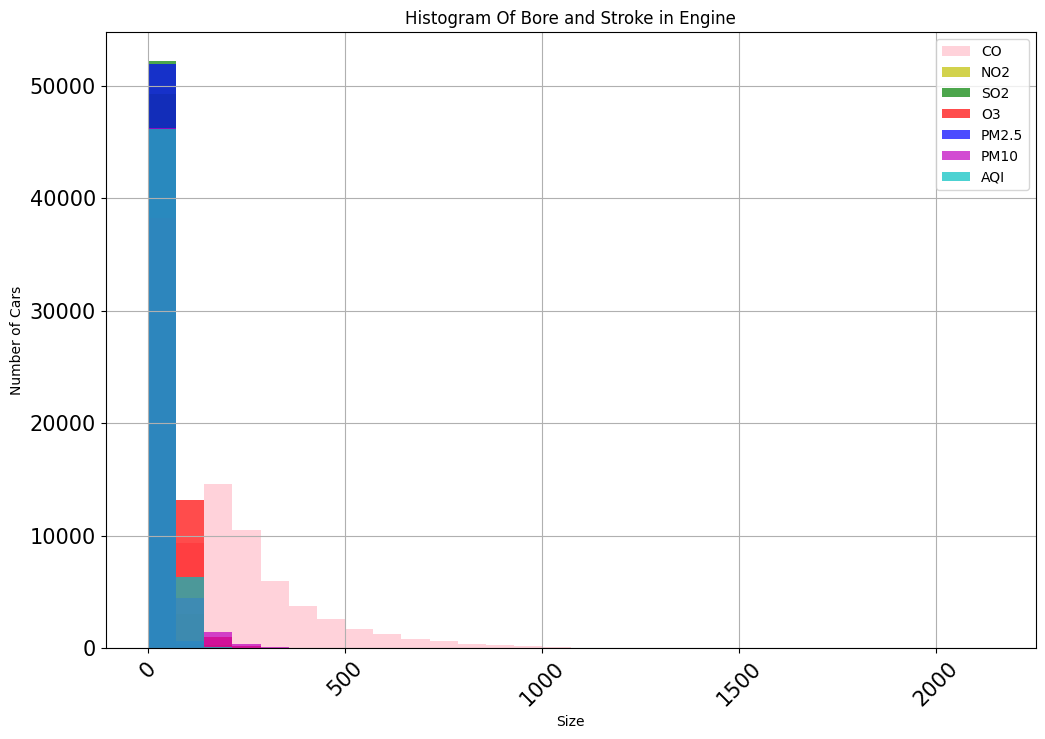

In [43]:
df[['City', 'CO','NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']].plot(kind='hist',
alpha=0.7,
bins=30,
title='Histogram Of Bore and Stroke in Engine',
rot=45,
grid=True,
figsize=(12,8),
fontsize=15,
color=['pink', 'y', 'g', 'r', 'b', 'm', 'c'])
plt.xlabel('Size')
plt.ylabel("Number of Cars");